# Прогноз колличества заболевших коронавирусом


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

!pip install geopandas
import geopandas
from shapely.geometry import Point
import math

In [2]:
# Загрузим наш датасет со статистикой 
# dataset = pd.read_csv('https://raw.githubusercontent.com/WolfusFlow/Data-Science/master/coronavirus_data_Feb01.csv', delimiter=',', parse_dates=['Last Update']) #index_col=False
# dataset_1 = pd.read_csv('https://raw.githubusercontent.com/WolfusFlow/Data-Science/master/coronavirus_statistic_2020-01-31.csv', delimiter=',')
dataset_1 = pd.read_csv('data_2020-04-08.csv')

In [3]:
#Отобразим его
dataframe = pd.DataFrame(dataset_1)
dataframe.info()
print(dataframe.describe())
dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56804 entries, 0 to 56803
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56804 non-null  int64 
 1   confirmed   56804 non-null  int64 
 2   country     56804 non-null  object
 3   date        56804 non-null  object
 4   datetime    56804 non-null  object
 5   deaths      56804 non-null  int64 
 6   file_date   56804 non-null  object
 7   province    56804 non-null  object
 8   recovered   56804 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB
         Unnamed: 0      confirmed        deaths     recovered
count  56804.000000   56804.000000  56804.000000  56804.000000
mean   28401.500000     307.399954     14.102598     79.241955
std    16398.046682    3688.995446    279.537789   1567.378485
min        0.000000       0.000000      0.000000      0.000000
25%    14200.750000       0.000000      0.000000      0.000000
50%    28401.500000     

,Unnamed: 0,confirmed,country,date,datetime,deaths,file_date,province,recovered
0,0,1,China,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,Anhui,0
1,18,0,China,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,Jilin,0
2,1,14,China,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,Beijing,0
3,2,6,China,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,Chongqing,0
4,3,1,China,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,Fujian,0
...,...,...,...,...,...,...,...,...,...
56799,56538,96,Australia,2020-04-06,2020-04-06 23:28:00,2,2020-04-06,Australian Capital Territory,40
56800,56616,1158,Australia,2020-04-06,2020-04-06 23:28:00,10,2020-04-06,Victoria,620
56801,56534,1250,Canada,2020-04-06,2020-04-06 23:28:00,23,2020-04-06,Alberta,0
56802,56592,4347,Canada,2020-04-06,2020-04-06 23:28:00,150,2020-04-06,Ontario,0


In [4]:
dataframe1 = pd.DataFrame(dataset_1)
dataframe1.info()
print(dataframe1.describe())
dataframe1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56804 entries, 0 to 56803
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56804 non-null  int64 
 1   confirmed   56804 non-null  int64 
 2   country     56804 non-null  object
 3   date        56804 non-null  object
 4   datetime    56804 non-null  object
 5   deaths      56804 non-null  int64 
 6   file_date   56804 non-null  object
 7   province    56804 non-null  object
 8   recovered   56804 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB
         Unnamed: 0      confirmed        deaths     recovered
count  56804.000000   56804.000000  56804.000000  56804.000000
mean   28401.500000     307.399954     14.102598     79.241955
std    16398.046682    3688.995446    279.537789   1567.378485
min        0.000000       0.000000      0.000000      0.000000
25%    14200.750000       0.000000      0.000000      0.000000
50%    28401.500000     

,Unnamed: 0,confirmed,country,date,datetime,deaths,file_date,province,recovered
0,0,1,China,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,Anhui,0
1,18,0,China,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,Jilin,0
2,1,14,China,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,Beijing,0
3,2,6,China,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,Chongqing,0
4,3,1,China,2020-01-22,2020-01-22 17:00:00,0,2020-01-22,Fujian,0
...,...,...,...,...,...,...,...,...,...
56799,56538,96,Australia,2020-04-06,2020-04-06 23:28:00,2,2020-04-06,Australian Capital Territory,40
56800,56616,1158,Australia,2020-04-06,2020-04-06 23:28:00,10,2020-04-06,Victoria,620
56801,56534,1250,Canada,2020-04-06,2020-04-06 23:28:00,23,2020-04-06,Alberta,0
56802,56592,4347,Canada,2020-04-06,2020-04-06 23:28:00,150,2020-04-06,Ontario,0


In [34]:
# Сгруппируем по стране/региону, где подтверждены случаи заражения Это для первого датасета
cases_by_country = dataframe.groupby(['province'])['confirmed'].sum().to_frame(name = 'Confirmed').reset_index()
cases_by_country.columns = ['province','confirmed']
cases_by_country.sort_values(by='confirmed', ascending=False, inplace=True)
cases_by_country.head()

,province,confirmed
181,Hubei,3844108
200,Italy,1942859
411,Spain,1472403
146,Germany,1142154
294,New York,1111714


In [14]:
cases_by_country = dataframe.groupby(['country'])['confirmed'].sum().to_frame(name = 'confirmed').reset_index()
cases_by_country.columns = ['country','confirmed']
cases_by_country.sort_values(by='confirmed', ascending=False, inplace=True)
cases_by_country.head()

,country,confirmed
40,China,4678762
3,America,2832628
97,Italy,1942859
180,Spain,1472403
72,Germany,1142171


In [ ]:
# Перемешаем данные
# dataframe = shuffle(dataframe)
# dataframe

Text(0.5, 1.0, 'Confirmed Infection')

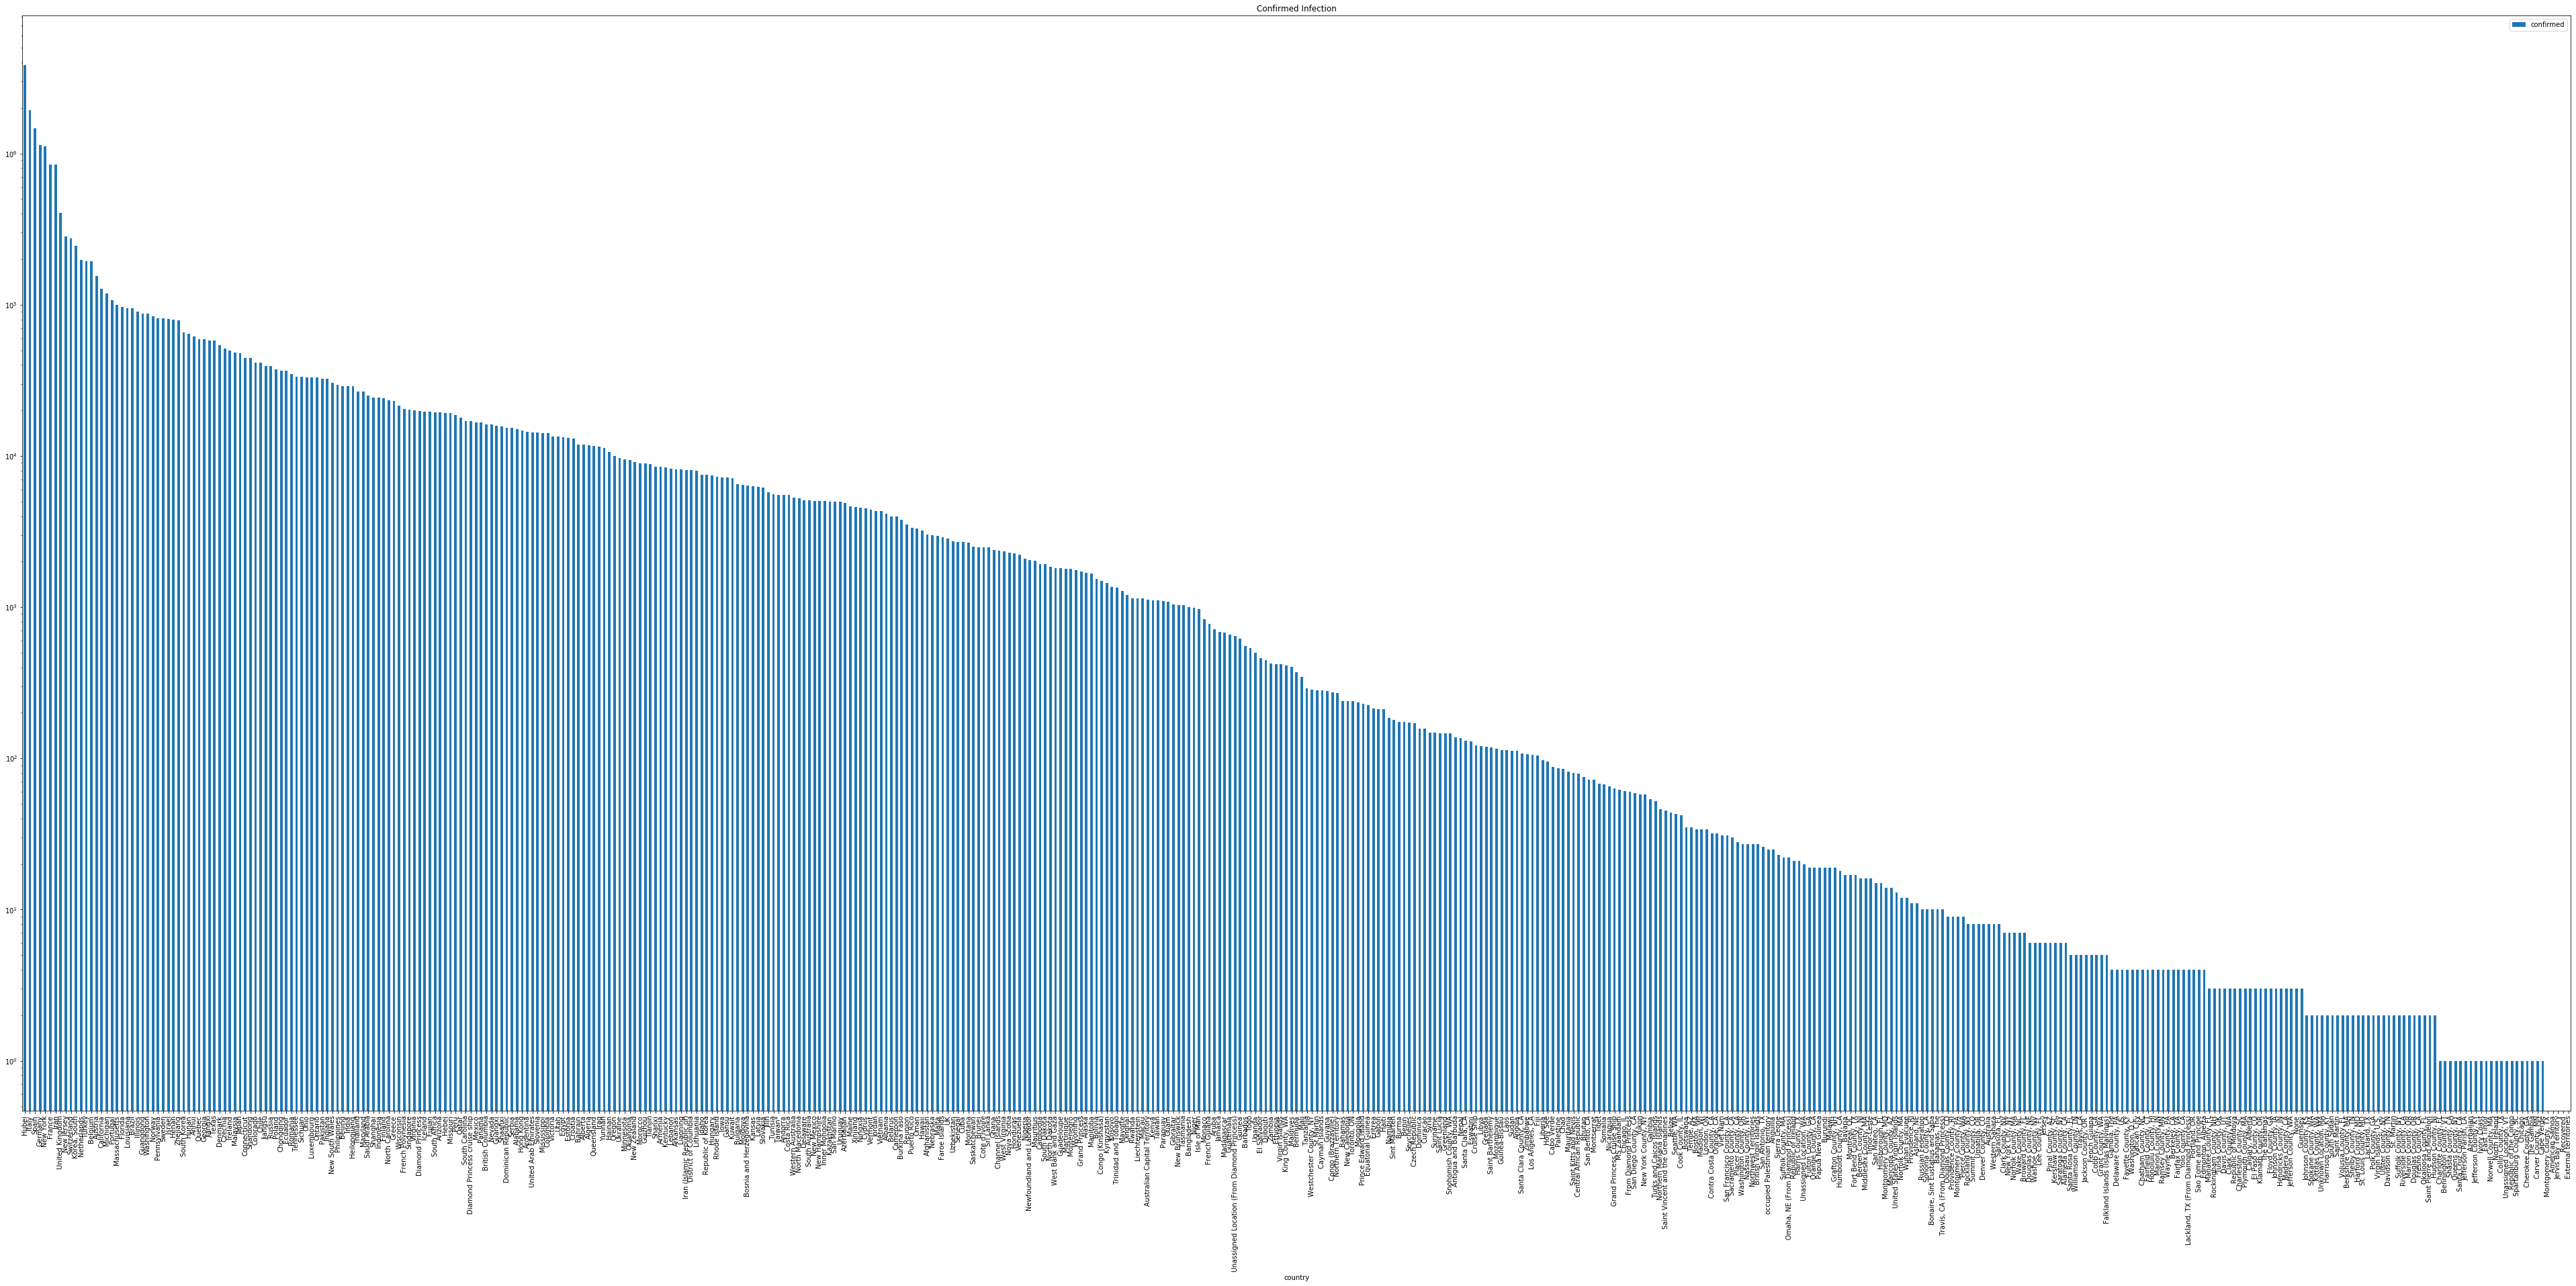

In [21]:
# Отобразим как график заражённых

# Что будем использовать на графике в качестве имени
def location_label(row):
    if pd.isnull(row['Province/State']):
        return row['Country/Region']
    else:
        return row['Province/State']

# Построим график
ax = cases_by_country.plot.bar(x='country', y='confirmed', figsize=(68, 30))
ax.set_yscale('log') # используем логарифмирование для лучшего отображения
ax.set_title('Confirmed Infection')


# Данный раздел с визуализацией на карте находится в разработке

In [ ]:
# Взять данные с сайта https://www.naturalearthdata.com/ и адаптировать для отображения на карте
# http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_countries.zip
# world_lines = geopandas.read_file('zip://./shapefiles/ne_50m_admin_0_countries.zip')
world_lines = geopandas.read_file('zip://./ne_50m_admin_0_countries.zip!ne_50m_admin_0_countries')
world = world_lines[(world_lines['POP_EST']>0) & (world_lines['ADMIN']!='Antarctica')]
world = world.rename(columns = {'ADMIN':'name'})

In [ ]:
# world_ncov = world.merge(jan25_12pm, left_on='name', right_on='Country/Region')
# Корректировки отображения график
w_ax = world.plot(color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5, figsize=(18, 8));
world_ncov.plot(ax=w_ax, column='Confirmed', cmap='OrRd', edgecolor = "lightgrey", linewidth = 0.5, figsize=(18, 8));

In [ ]:
cols = ['name','Confirmed','geometry'] 
ncov = pd.concat([world_ncov[cols],us_state_ncov[cols],china_provinces_ncov[cols],china_cities_ncov[cols]],ignore_index=True)

ncov['log_confirmed'] = ncov.apply(lambda x: math.log10(x['Confirmed']), axis=1)
ncov[['name','Confirmed','log_confirmed']].sort_values(by='log_confirmed', ascending=False).head()

In [ ]:
# Посмотреть график
ax = world.plot(
    color = "lightslategray", 
    edgecolor = "slategray", 
    linewidth = 0.5, figsize=(18, 6));
ax.set_facecolor("slategray")
ax.set_clip_on(False)
#ax.axis('off')

ncov.plot(
    ax=ax, 
    column='Confirmed', 
    norm=colors.LogNorm(vmin=1, vmax=1000),
    legend=True,
    legend_kwds={'label': "Confirmed 2019-nCoV Cases"},
    cmap='OrRd')

In [22]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

def plot_world(world):  
    # Remove antartica
    world = world[(world.name!="Antarctica")]
#     world = world.to_crs({'init': 'epsg:3395'})
    
    fig, ax = plt.subplots(figsize=(20,20)) # Set Size
    
    ax.set_title("World Map View");
    ax.axis(False) # Turn off axis
    
    world.plot(ax=ax, cmap='Reds')

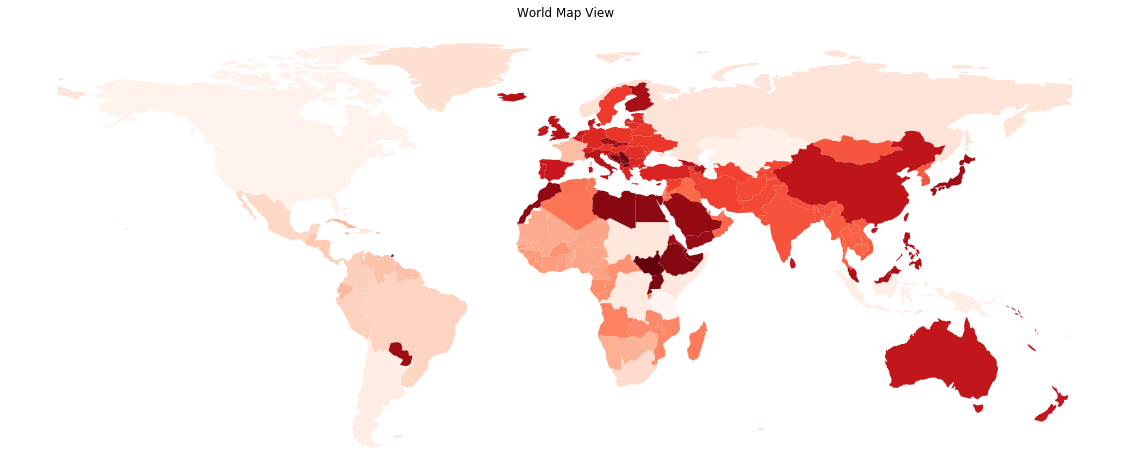

In [23]:
plot_world(world)

## Препроцессинг ###

In [24]:
from sklearn import preprocessing

df = dataframe.copy()
# df.dropna()
print(df.dtypes)

le = preprocessing.LabelEncoder()
# df[['Province/State']] = le.fit_transform(df['Province/State'].astype(str))
# df[['Country/Region']] = le.fit_transform(df['Country/Region'].astype(str))
# df = df.drop(columns='Last Update')
# df = df.dropna()
df[['province']] = le.fit_transform(df['province'].astype(str))
df[['country']]  = le.fit_transform(df['country'].astype(str))
df[['date']]     = le.fit_transform(df['date'].astype(str))
df = df.dropna()
df = pd.get_dummies(df, prefix='', prefix_sep='')

# First 15 rows of our dataset.
print(dataframe.head(15))

def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_dataframe, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_dataframe.head() 

Unnamed: 0     int64
confirmed      int64
country       object
date          object
datetime      object
deaths         int64
file_date     object
province      object
recovered      int64
dtype: object
    Unnamed: 0  confirmed    country        date             datetime  deaths  \
0            0          1      China  2020-01-22  2020-01-22 17:00:00       0   
1           18          0      China  2020-01-22  2020-01-22 17:00:00       0   
2            1         14      China  2020-01-22  2020-01-22 17:00:00       0   
3            2          6      China  2020-01-22  2020-01-22 17:00:00       0   
4            3          1      China  2020-01-22  2020-01-22 17:00:00       0   
5            4          0      China  2020-01-22  2020-01-22 17:00:00       0   
6            6          2      China  2020-01-22  2020-01-22 17:00:00       0   
7            7          1      China  2020-01-22  2020-01-22 17:00:00       0   
8           17          2      China  2020-01-22  2020-01-22 17:00:0

,Unnamed: 0,confirmed,country,date,deaths,province,recovered,2020-01-22 17:00:00,2020-01-23 17:00:00,2020-01-24 17:00:00,...,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
0,0,1,40,0,0,14,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,0,40,0,0,212,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,14,40,0,0,32,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,6,40,0,0,75,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,40,0,0,139,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
encoded_dataframe.describe()

,Unnamed: 0,confirmed,country,date,deaths,province,recovered,2020-01-22 17:00:00,2020-01-23 17:00:00,2020-01-24 17:00:00,...,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06
count,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,...,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000,56804.000000
mean,28401.500000,307.399954,17.558130,63.076174,14.102598,270.112034,79.241955,0.000669,0.000810,0.000722,...,0.060383,0.060453,0.060542,0.042849,0.043747,0.045226,0.046212,0.047162,0.048659,0.049451
std,16398.046682,3688.995446,40.556933,12.441650,279.537789,132.400751,1567.378485,0.025856,0.028446,0.026857,...,0.238197,0.238327,0.238489,0.202519,0.204533,0.207801,0.209945,0.211987,0.215155,0.216809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14200.750000,0.000000,3.000000,61.000000,0.000000,188.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28401.500000,3.000000,3.000000,66.000000,0.000000,270.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42602.250000,20.000000,3.000000,70.000000,0.000000,391.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,56803.000000,136675.000000,210.000000,75.000000,16523.000000,496.000000,64014.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Построим графики что бы увидеть распределение величин
fig = plt.figure(figsize=(160,80))
cols = 5

rows = np.ceil(float(encoded_dataframe.shape[1]) / cols)
for i, column in enumerate(encoded_dataframe.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_dataframe[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Посмотрим, какие присутствуют корреляции
def show_heat_map(dataframe):
  plt.subplots(figsize=(100,100))
  sns.heatmap(dataframe.corr(), square=True)
  plt.show()

show_heat_map(encoded_dataframe)

In [27]:
# Выделим целвую переменную
y = encoded_dataframe['confirmed'].values
print(y)

encoded_dataframe.drop(['confirmed'], axis=1, inplace = True)

[   1    0   14 ... 1250 4347  460]


In [28]:
X = encoded_dataframe.values.astype(np.float)
print(X, '\n')

sc = sklearn.preprocessing.StandardScaler()
X = sc.fit_transform(X)
X

[[0.0000e+00 4.0000e+01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.8000e+01 4.0000e+01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 4.0000e+01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [5.6534e+04 3.3000e+01 7.5000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [5.6592e+04 3.3000e+01 7.5000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [5.6618e+04 1.0000e+01 7.5000e+01 ... 0.0000e+00 0.0000e+00 1.0000e+00]] 



array([[-1.73202032,  0.55334726, -5.06980402, ..., -0.22247817,
        -0.22615768, -0.22808625],
       [-1.73092261,  0.55334726, -5.06980402, ..., -0.22247817,
        -0.22615768, -0.22808625],
       [-1.73195933,  0.55334726, -5.06980402, ..., -0.22247817,
        -0.22615768, -0.22808625],
       ...,
       [ 1.71561578,  0.38074887,  0.95838818, ..., -0.22247817,
        -0.22615768,  4.38430646],
       [ 1.71915282,  0.38074887,  0.95838818, ..., -0.22247817,
        -0.22615768,  4.38430646],
       [ 1.72073839, -0.18636015,  0.95838818, ..., -0.22247817,
        -0.22615768,  4.38430646]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
print(X_train)
print(y_train)
print('\n', X_test)
print(y_test)

[[ 0.92606357 -0.35895855  0.6368846  ... -0.22247817 -0.22615768
  -0.22808625]
 [-1.66914642  0.38074887 -4.02491737 ... -0.22247817 -0.22615768
  -0.22808625]
 [-0.70823083 -0.35895855 -0.08649847 ... -0.22247817 -0.22615768
  -0.22808625]
 ...
 [ 0.86556803 -0.35895855  0.5565087  ... -0.22247817 -0.22615768
  -0.22808625]
 [ 1.05894642  0.03555207  0.6368846  ... -0.22247817 -0.22615768
  -0.22808625]
 [-1.58309883  1.19442703 -2.25664766 ... -0.22247817 -0.22615768
  -0.22808625]]
[  8   2   0 ... 396  13   2]

 [[-0.30720393 -0.35895855  0.07425333 ... -0.22247817 -0.22615768
  -0.22808625]
 [-0.69243613 -0.35895855 -0.08649847 ... -0.22247817 -0.22615768
  -0.22808625]
 [-1.65530319  2.92041101 -4.34642096 ... -0.22247817 -0.22615768
  -0.22808625]
 ...
 [ 1.62279903 -0.35895855  0.95838818 ... -0.22247817 -0.22615768
   4.38430646]
 [-1.55681498  1.93413445 -1.93514408 ... -0.22247817 -0.22615768
  -0.22808625]
 [ 0.85068808 -0.35895855  0.5565087  ... -0.22247817 -0.22615768


Построим логистическую регрессию с использованием данных для обучения

In [30]:
# Импортируем библиотеки
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

print(X_train.shape)
print(y_train.shape)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Создадим экземпляр класса логистической регрессии и передадим в него обучающие выборки
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


(36922, 2214)
(36922,)


/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = logreg.predict(X_test) 
print('Точность классификатора логистической регрессии на test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#Построим confusion matrix что бы увидеть точность по TP TN FP FN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix, '\n')

# Выведем метрики нашего классификатора
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Точность классификатора логистической регрессии на test set: 0.34
[[4882   90    2 ...    0    0    0]
 [1374 1386   13 ...    0    0    0]
 [ 702  655  106 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]] 

              precision    recall  f1-score   support

           0       0.48      0.98      0.65      4989
           1       0.20      0.48      0.29      2875
           2       0.43      0.07      0.12      1521
           3       0.17      0.05      0.08      1061
           4       0.25      0.04      0.08       699
           5       0.40      0.05      0.09       559
           6       0.05      0.02      0.03       429
           7       0.17      0.03      0.05       370
           8       0.06      0.03      0.04       316
           9       0.12      0.04      0.06       270
          10       0.12      0.07      0.09       288
          11       0.37      0.03      0.06       210
 

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


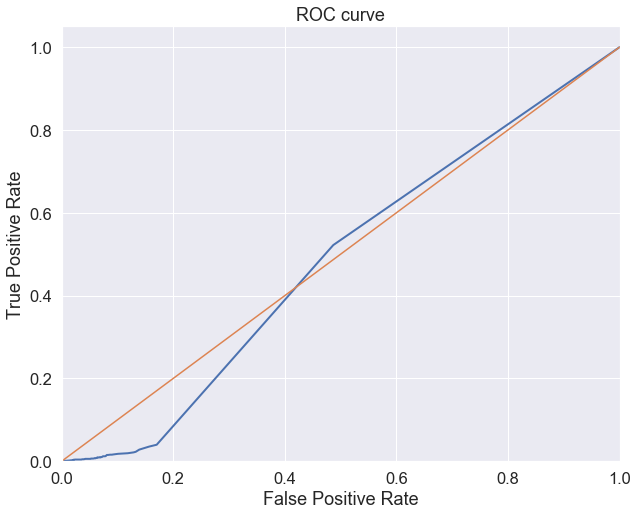

In [32]:
# Построим ROC кроивую для оценки модели в целом
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# Передадим целевой столбец ответом и результат классификатора
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
lw = 2

# Зададим параметры отображения
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

# Добавим кросс валидацию для лог регрессии

In [33]:
from sklearn.linear_model import LogisticRegressionCV

# Всё равно, даже после препроцессинга получаю сообщение с просьбой увеличения
# итераций хотя из уже 210 или с предложениями препроцессинга. 
# Increase the number of iterations (max_iter) or scale the data

from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
print(X_scaled.shape)

# Скормим данные на которых она будет учиться
logReg_cv = LogisticRegressionCV(cv=5, random_state=0, max_iter=210).fit(X_scaled, y_train)

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


(36922, 2214)


/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KeyboardInterrupt: 

In [ ]:
# Выведем точность классификатора данной модели после кросс валидации

print('Оценка логистической регрессии:')
y_pred_cv = logReg_cv.predict(X_test)
print(logReg_cv.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix, '\n')

print(classification_report(y_test, y_pred_cv))

print('\nКак можем видеть точность выше чем у модели без кросс валидации')

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# Передадим целевой столбец ответом и результат классификатора
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_cv, pos_label=1)
lw = 2

# Зададим параметры отображения
plt.plot(fpr, tpr, lw=lw, label='ROC curve after Cross Validation')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

# Воспользуемся решающим деревом

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Создадим экземпляр решающего дерева и обучим его
classif_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=50) 
classif_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
from sklearn.metrics import accuracy_score

# Предскажем значения
y_pred =  classif_tree.predict(X_test)

print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Точность модели на тестовых данных:  0.3429735439090635


In [37]:
# Используем кросс валидацию для поиска оптимальной глубины 'max_depth'
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
classif_tree_cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
classif_tree_cv.fit(X_train, y_train)
tree_model = classif_tree_cv.best_estimator_
print (classif_tree_cv.best_score_, classif_tree_cv.best_params_) 

y_pred_tree_cv = classif_tree_cv.predict(X_test)
print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test, y_pred=y_pred_tree_cv))
print('Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке')

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.3464871547916738 {'max_depth': 12}
Точность модели на тестовых данных:  0.3410119706266975
Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке


# Подход с использованием Bagging



In [38]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=100, n_features=4,
#                             n_informative=2, n_redundant=0,
#                             random_state=0, shuffle=False)

# clf = BaggingClassifier(base_estimator=SVC(),
#                          n_estimators=10, random_state=0).fit(X, y)


# Зададим параметры решающего дерева
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=50)
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train, y_train)
y_test_pred=bag_model.predict(X_test) # предсказание
print(bag_model.score(X_test, y_test))
# print(confusion_matrix(y_test, y_test_pred)) 

# Используем разные методы
lr = LogisticRegression();
bnb = BernoulliNB()
# gnb = GaussianNB()

base_methods=[lr, bnb, dtc] #gnb, 
scores = []
output_method_names = []

# Пройдёмся по разным методам и отобразим из точность
for bm  in base_methods:
 print("\nМетод: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm, n_estimators=100, bootstrap=True)
 bag_model=bag_model.fit(X_train, y_train)
 y_test_pred=bag_model.predict(X_test)
 print('\n',classification_report(y_test, y_test_pred))
 model_score = bag_model.score(X_test, y_test)
 print('Score: ', model_score)
 scores.append(model_score)

#  print(confusion_matrix(y_test, y_test_pred)) 

for bm in base_methods:
  name, _ = str(bm).split('(')
  output_method_names.append(name)

scores_df = pd.DataFrame(list(zip(output_method_names, scores)), 
                         columns=['method', 'score'])

print(scores_df) #Наш датафрейм для красивого отображения
    
# Отобразим график алгоритма к его оценке
chart = sns.catplot(x='method', y='score', kind="bar", data=scores_df);

chart.set_xticklabels(rotation=65, horizontalalignment='right')


0.35298259732421283

Метод:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

KeyboardInterrupt: 

### Как можем наблюдать все ветоды имеют близкие значения, но логистический регрессор чуть уступает

# Реализуем подход с использованием случайного леса

In [ ]:
# Импорт модели, которую будем использовать
from sklearn.ensemble import RandomForestRegressor
# Инстанциируем модель с 1000 деревьями решений
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Натренируем модель на train данных
rf.fit(X_train, y_train);

In [ ]:
# Используем метод предсказания 'леса' на тестовых данных
predictions = rf.predict(X_test)
# Высчитаем абсолютные ошибки
errors = abs(predictions - y_test)
# Высчитаем среднюю абсолютную ошибку (mae)
print('Average Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
# Высчитаем среднюю абсолютную ошибку (MAPE)
mape = 100 * (errors / y_test)
# Высчитаем и отобразим точность
accuracy = 100 - np.mean(mape)
print(mape)
print(accuracy)
# Выкинем nan
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

regressor = RandomForestRegressor(n_estimators=1200, random_state=100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

errors = abs(y_pred - y_test)
# Отобразим обученную на расширенных данных
print('Average absolute error: ', round(np.mean(errors), 2), 'degrees.')
print('Mean Asolute Percentage Error')
mape = np.mean(100 * (errors / y_test))


# Отобразим наши метрики
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))

# Построим knn классификатор

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Объявем кнн классификатор
knn = KNeighborsClassifier()
knn_grid = {'n_neighbors': np.array(np.linspace(1, 60), dtype='int')} 

#Зададим параметры кросс валидации
gs = GridSearchCV(knn, knn_grid, cv=24)
gs.fit(X, y)

In [ ]:
# Зададим функцию отрисовки
def grid_plot(x, y, x_label, title, y_label='roc_auc'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [ ]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
print(gs.best_params_, gs.best_score_)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3) #gs.best_model
clf_knn = knn.fit(X_train, y_train)

y_knn = clf_knn.predict(X_test)
y_knn

In [ ]:
print ('knn =', metrics.accuracy_score(y_test, y_knn), '\n')
print(metrics.classification_report(y_test, y_knn))

In [ ]:
# Параметры f1 метрики
print('macro = ', metrics.f1_score(y_test, y_knn, average='macro'), ', micro = ', metrics.f1_score(y_test, y_knn, average='micro'))

### Точность довольно слабая

# Преступим к нейросетевому подходу

In [ ]:
!pip install git+git://github.com/keras-team/keras.git --upgrade --no-deps

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense


tf.keras.backend.clear_session()  # Для чистого/простого сброса состояния notebook.

In [ ]:


#настройка tf конфига
config = tf.ConfigProto(
    device_count={'GPU': 1},
    intra_op_parallelism_threads=1,
    allow_soft_placement=True
)

config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.6

session = tf.Session(config=config)

keras.backend.set_session(session)


In [ ]:
# Подготовим данные для модели
inputs = keras.Input(shape=(6), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(12000, activation='softmax', name='predictions')(x)

# Поместим данные в модель
model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
print(X,'\n\n', X.shape)

In [ ]:
# Специфицируем обучающую конфигурацию метрики, потери, оптимизатор
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Train the model by slicing the data into "batches"
# of size "batch_size", and repeatedly iterating over
# the entire dataset for a given number of "epochs"
print('# Fit model on training data')
# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=3,
                    # Добавил валидацию для мониторинга потерь и метрик в конце эпох
                    # validation_data=(x_val, y_val))
history = model.fit(x=X, y=y, batch_size=None, epochs=1,
                   verbose=1, callbacks=None, validation_split=0.0,
                   validation_data=None, shuffle=True, class_weight=None, 
                   sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
                   validation_steps=None, validation_freq=1, max_queue_size=10,
                   workers=1, use_multiprocessing=False)


# Возвращённый объект "Истории" имеет записи значний
# потерь и метрики значения в ходе обучения
print('\nhistory dict:', history.history)

# Оценим модель на тестовых данных используя `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X, y, batch_size=128)
print('test loss, test acc:', results)

# Генерируем предсказания (вероятность -- вывод последнего слоя)
# используем `predict` на новых данных
print('\n# Generate predictions for 3 samples')
predictions = model.predict(X_test[:4])
print('predictions shape:', predictions.shape)


In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# скомпилируем keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])  #binary_crossentropy
# model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])


In [ ]:
# Скормим keras модели наши данные

X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.35, random_state=42)
model.fit(X_train_keras, y_train_keras, epochs=200, batch_size=10) # Сделаем колличество эпох обучения 400 что бы лучше обучить модель

In [ ]:
# Отобразим точность модели
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Воспользуемся другой моделью

In [ ]:
model = Sequential([
  Dense(32, activation='relu', input_shape=(6,)), # , kernel_initializer='normal'
  Dense(32, activation='relu'),
  Dense(1, activation='sigmoid'),
])

In [ ]:
# Скомпилируем модель
model.compile(optimizer='adam', #sgd
              loss='mean_squared_error', #binary_crossentropy
              metrics=['accuracy'])

In [ ]:
X_val, X_val_test, y_val, y_val_test = train_test_split(X_test, y_test, test_size=0.5)
print(X_train.shape, X_val_test.shape, X_test.shape, y_train.shape, y_val.shape, y_val_test.shape)
# print(X_val, X_val.shape, y_val, y_val.shape)

In [ ]:
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import KFold, cross_val_score

# estimator = KerasRegressor(build_fn=model, epochs=120, batch_size=5, verbose=0)
# folds = KFold(n_splits=10)
# result = cross_val_score(estimator, X, y, cv=folds)
# print(f'Baseline: {result.mean()},   {result.std()}')

In [ ]:
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=120,
          validation_data=(X_val, y_val))

In [ ]:
# отобразим график loss у нашей сети
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.rcParams['figure.figsize'] = [25, 5]
plt.show()

In [ ]:
# график точности
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.rcParams['figure.figsize'] = [25, 5]
plt.show()

Точность второй модели повысилась на пару процентов.



Воспользуемся XGBoost

In [ ]:
import xgboost as xgb
# read in data
# dtrain = xgb.DMatrix(X_train)
# dtest = xgb.DMatrix(X_test)
# # specify parameters via map
# param = {'max_depth':12, 'eta':1, 'objective':'binary:logistic' }
# num_round = 2
# bst = xgb.train(param, dtrain, num_round)
# # make prediction
# preds = bst.predict(dtest)


xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 12, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

In [ ]:
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 12, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head() # Выведем результаты по 5 фолдам кросс валидации

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

In [ ]:
# Визуализируем

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 10]
plt.show()

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()